### Financial Stock Price Analysis using `TA-Lib` and `pynance`


# Import necessary libraries


In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas_ta as ta
import seaborn as sns


# Set up the visualizations


In [7]:
sns.set(style="whitegrid")
plt.style.use('fivethirtyeight')

# Load the dataset


In [8]:
def load_stock_data(file_name):
    df = pd.read_csv(file_name, parse_dates=['Date'], index_col='Date')
    return df

### Directory where your CSV files are located


In [15]:
data_directory = "../data"

## List of stock files


In [16]:
stock_files = [
    os.path.join(data_directory, 'NVDA_historical_data.csv'),
    os.path.join(data_directory, 'AAPL_historical_data.csv'),
    os.path.join(data_directory, 'AMZN_historical_data.csv'),
    os.path.join(data_directory, 'GOOG_historical_data.csv'),
    os.path.join(data_directory, 'META_historical_data.csv'),
    os.path.join(data_directory, 'MSFT_historical_data.csv'),
    os.path.join(data_directory, 'TSLA_historical_data.csv')
]

### Load all data into a dictionary


In [17]:
stocks_data = {os.path.basename(file).split('_')[0]: load_stock_data(file) for file in stock_files}


# Apply Analysis Indicators

## Calculate technical indicators for a specific stock

In [23]:
def calculate_indicators(df):
    # Add Moving Averages
    df['SMA_50'] = ta.sma(df['Close'], length=50)
    df['SMA_200'] = ta.sma(df['Close'], length=200) # Add RSI (Relative Strength Index)
    df['RSI_14'] = ta.rsi(df['Close'], length=14) # Add MACD (Moving Average Convergence Divergence)
    macd = ta.macd(df['Close'], fast=12, slow=26, signal=9)
    df['MACD'] = macd['MACD_12_26_9']
    df['MACD_Signal'] = macd['MACDs_12_26_9']
    
    return df

## Calculate indicators for each stock


In [24]:
for ticker, df in stocks_data.items():
    stocks_data[ticker] = calculate_indicators(df)

# Use PyNance for Financial Metrics

In [29]:
def calculate_financial_metrics(df):
    # Example: Calculate daily returns
    df['Daily_Return'] = df['Close'].pct_change()
    
    # Example: Calculate cumulative returns
    df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()
    
    return df

## Calculate financial metrics for each stock


In [30]:
for ticker, df in stocks_data.items():
    stocks_data[ticker] = calculate_financial_metrics(df)

## Visualize the Data


In [40]:
def plot_close_price_moving_average(df, ticker):
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.plot(df.index, df['SMA_50'], label='50-Day SMA', color='green')
    plt.plot(df.index, df['SMA_200'], label='200-Day SMA', color='red')
    plt.title(f'{ticker} - Close Price and Moving Averages')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'../data/{ticker}_Close_Price_Moving_Averages.png')
    plt.show()

def plot_rsi(df, ticker):
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['RSI_14'], label='RSI (14)', color='purple')
    plt.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(y=30, color='green', linestyle='--', label='Oversold (30)')
    plt.title(f'{ticker} - Relative Strength Index (RSI)')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'../data/{ticker}_RSI.png')
    plt.show()

def plot_macd(df, ticker):
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['MACD'], label='MACD', color='blue')
    plt.plot(df.index, df['MACD_Signal'], label='MACD Signal', color='orange')
    plt.title(f'{ticker} - MACD')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'../data/{ticker}_MACD.png')
    plt.show()

def plot_cumulative_return(df, ticker):
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['Cumulative_Return'], label='Cumulative Return', color='black')
    plt.title(f'{ticker} - Cumulative Return')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'../data/{ticker}_Cumulative_Return.png')
    plt.show()

## Visualization for Historical Stock Data


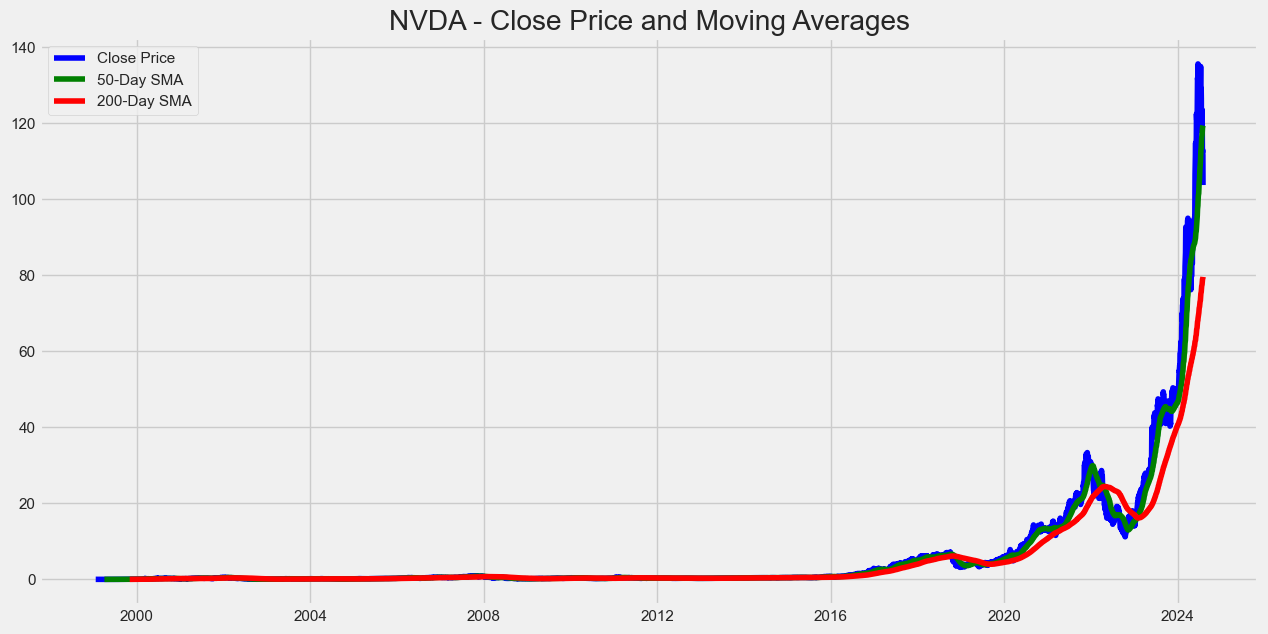

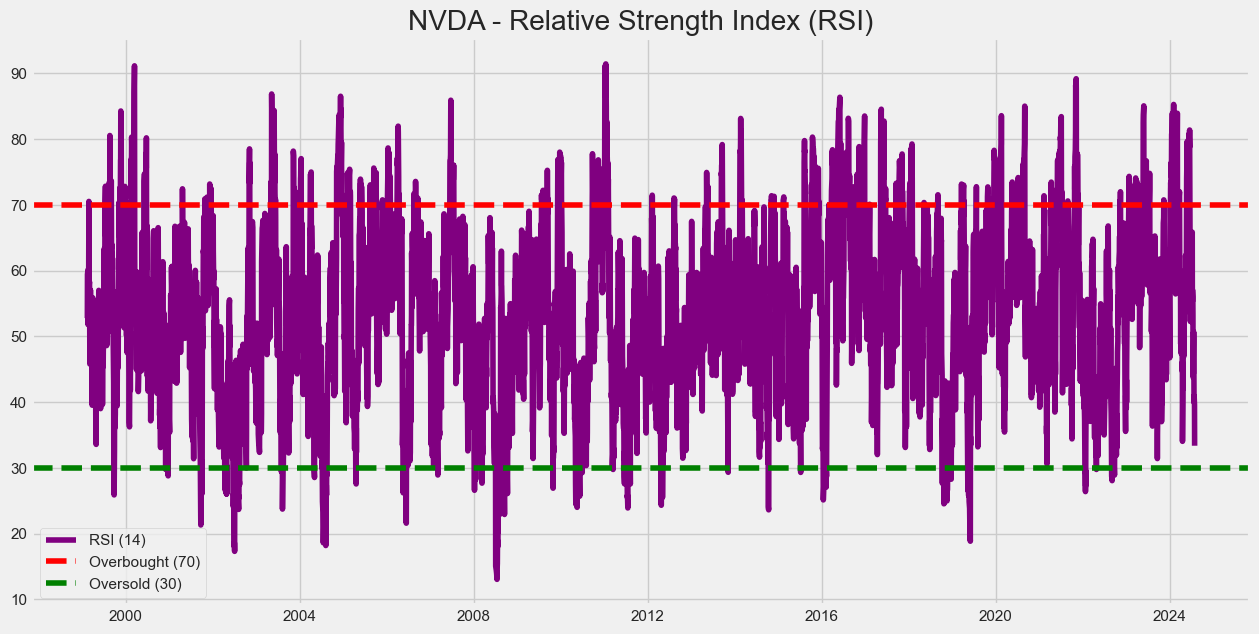

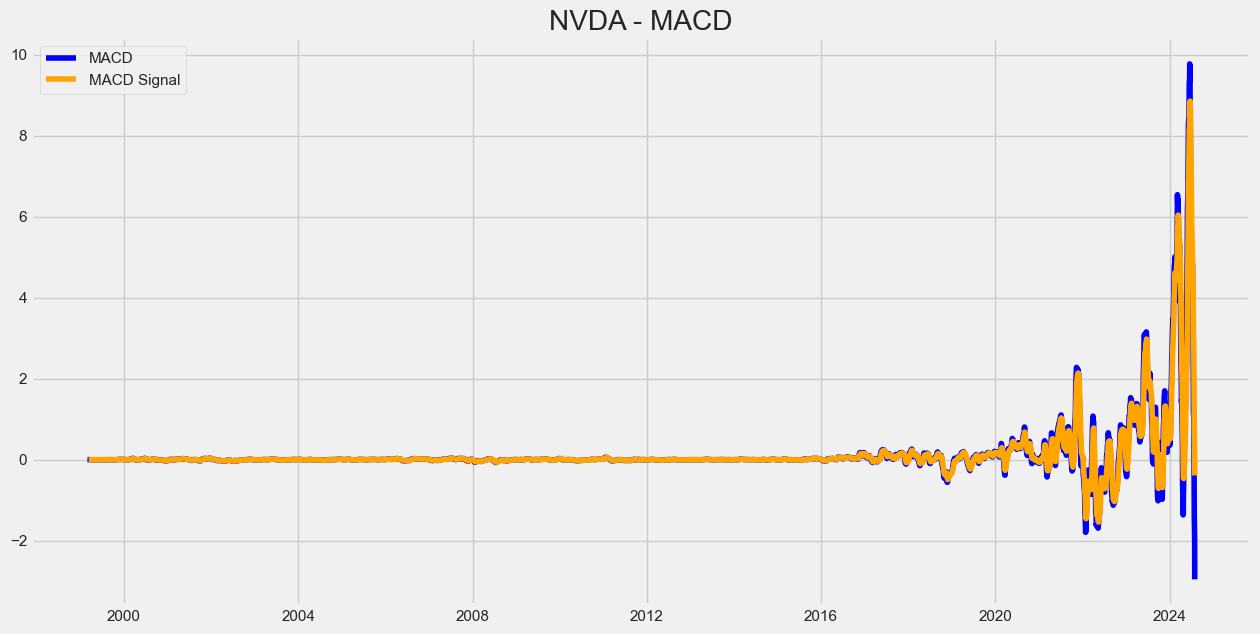

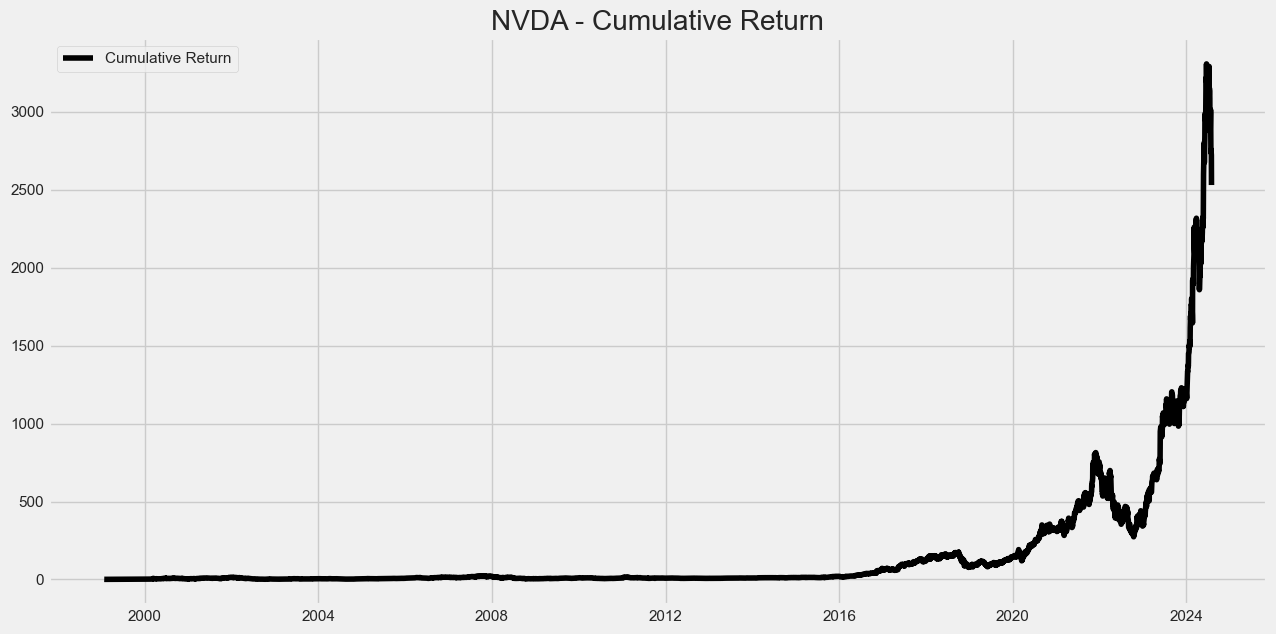

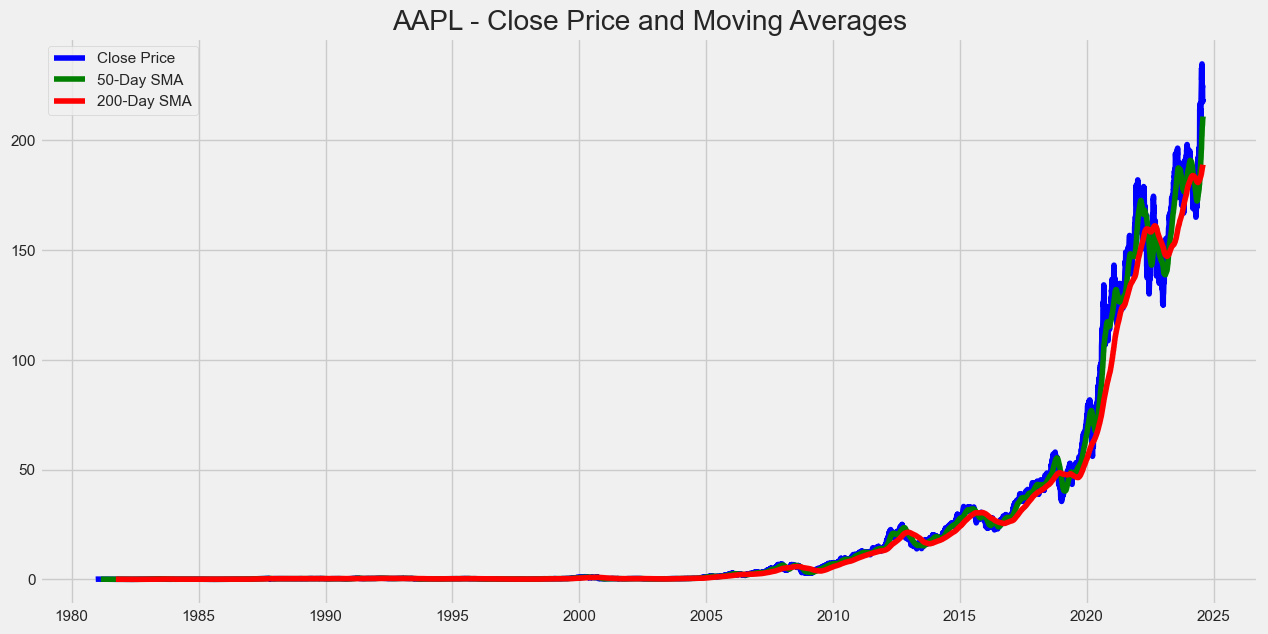

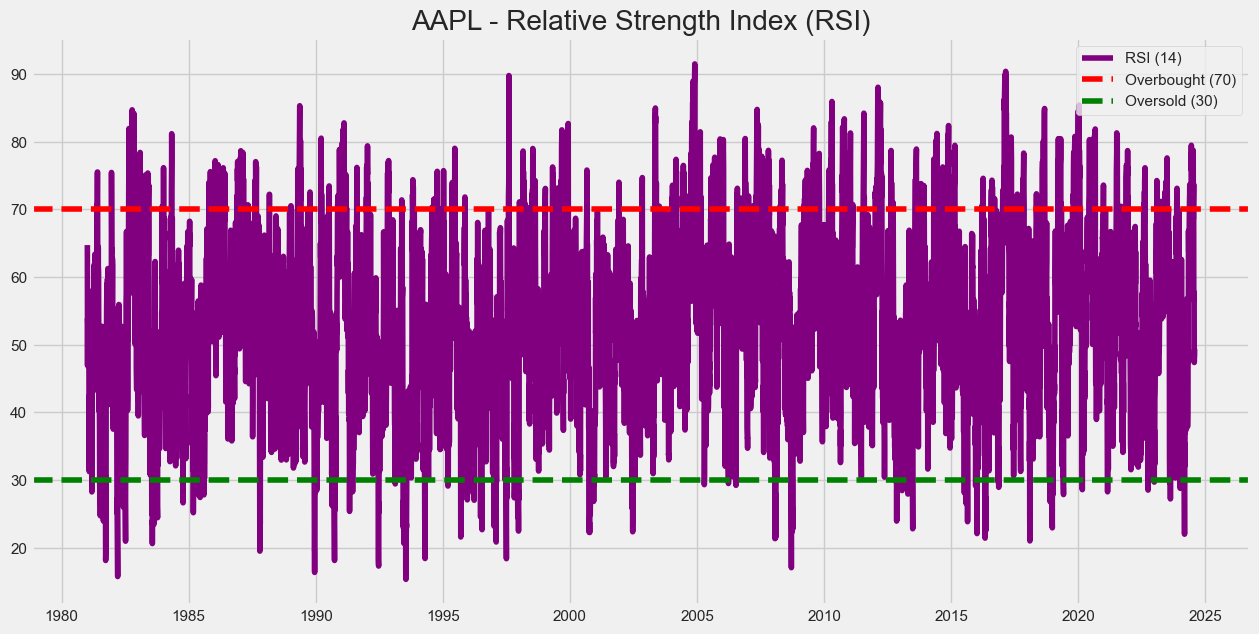

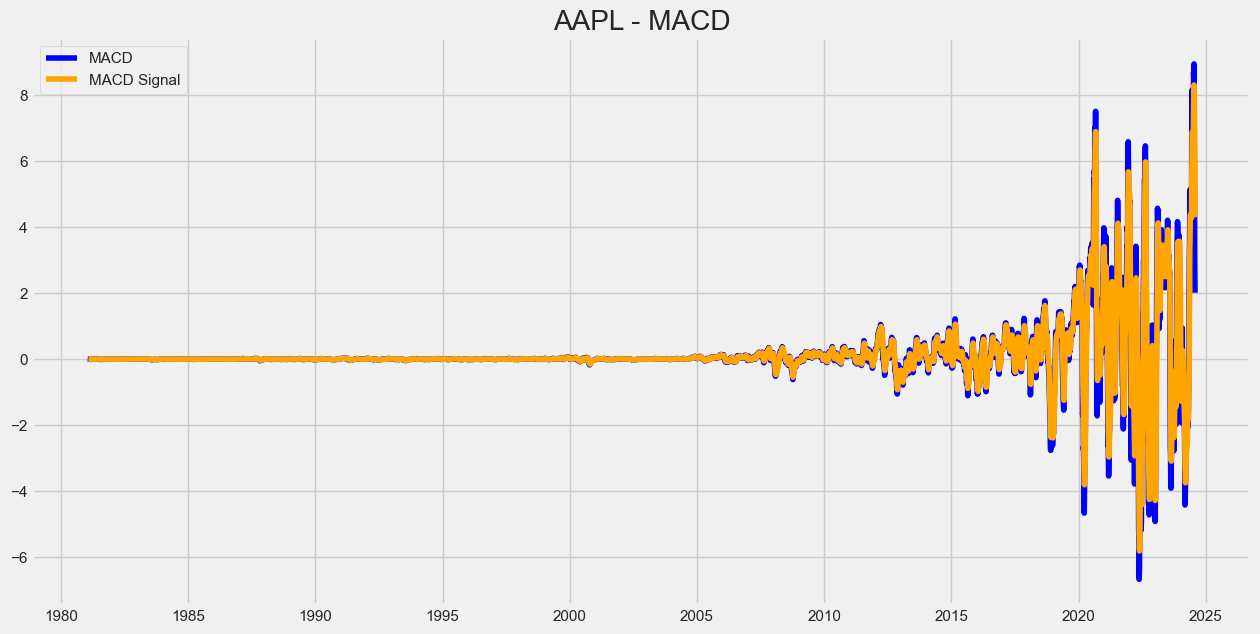

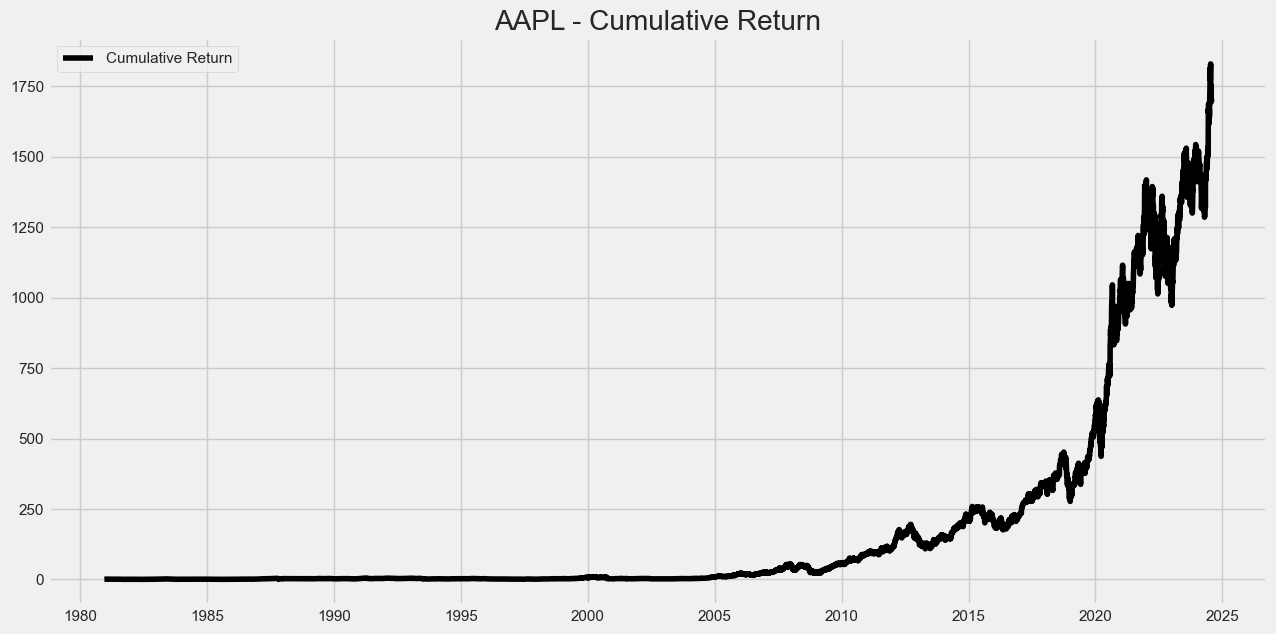

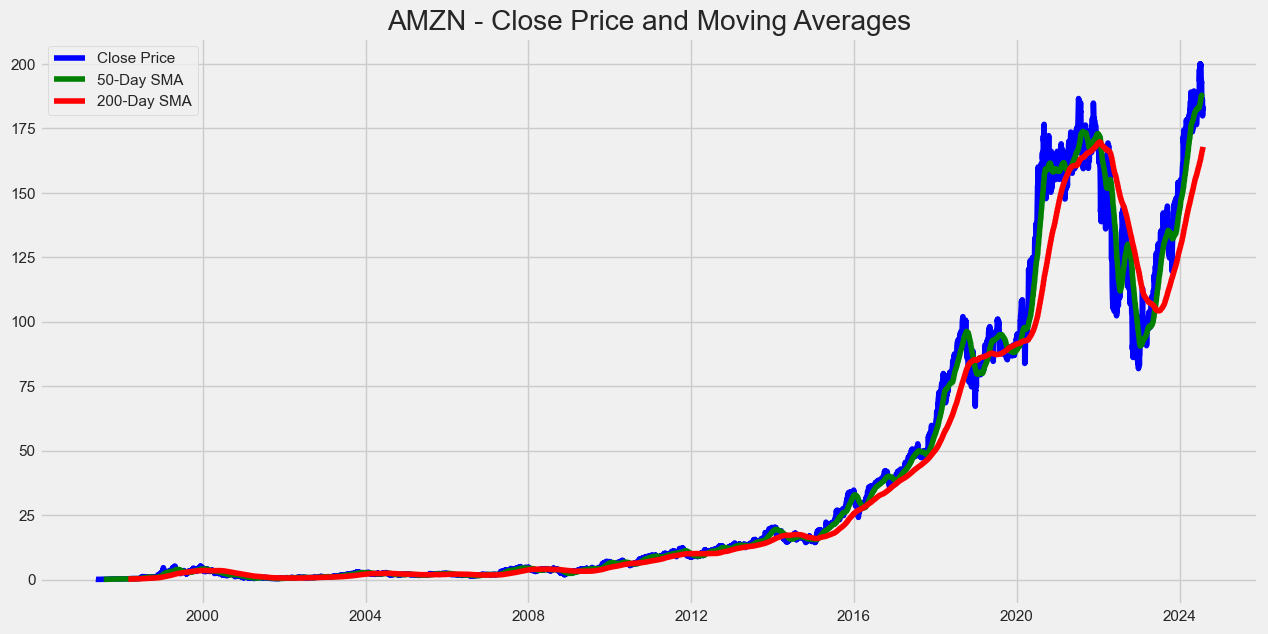

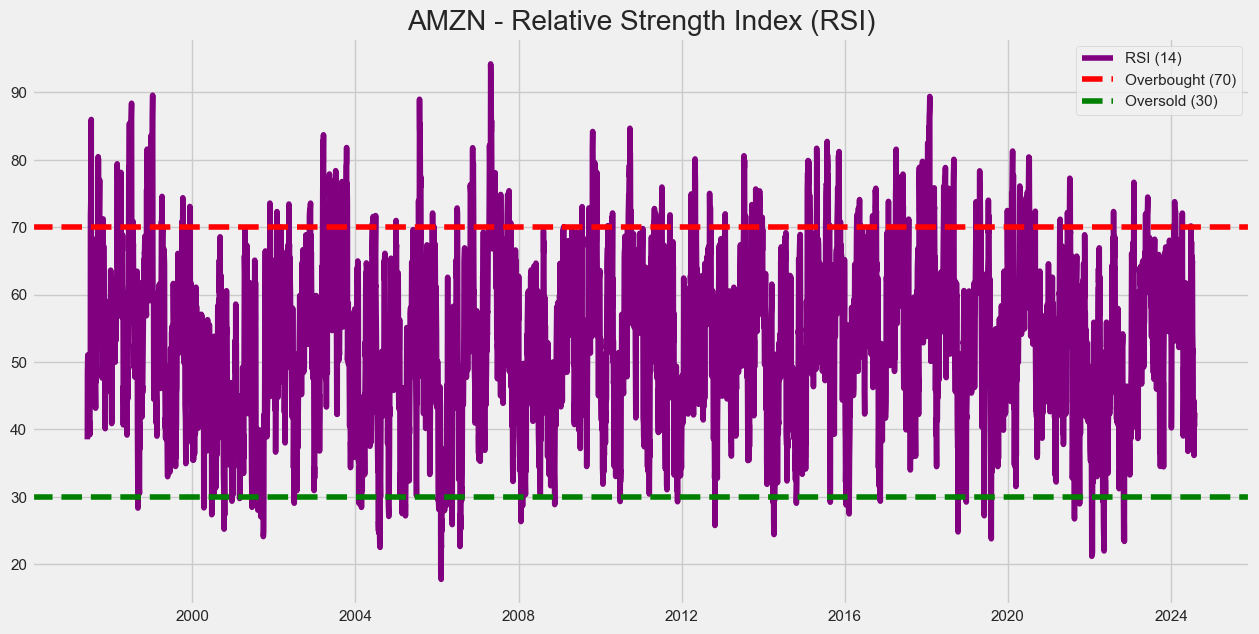

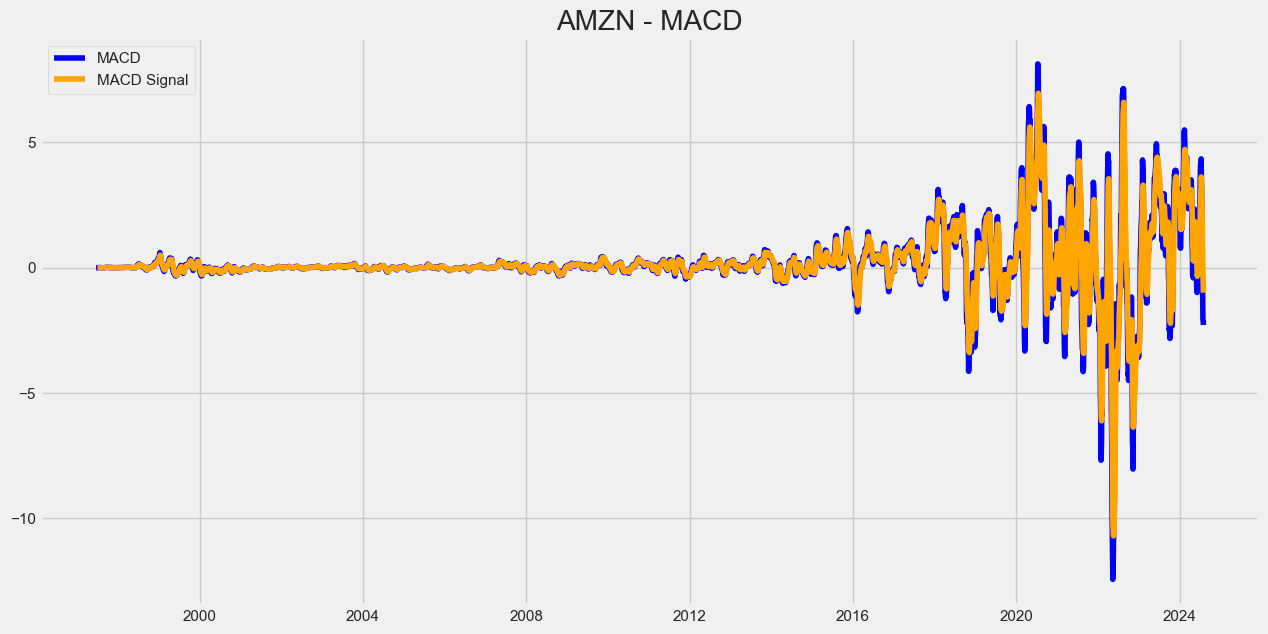

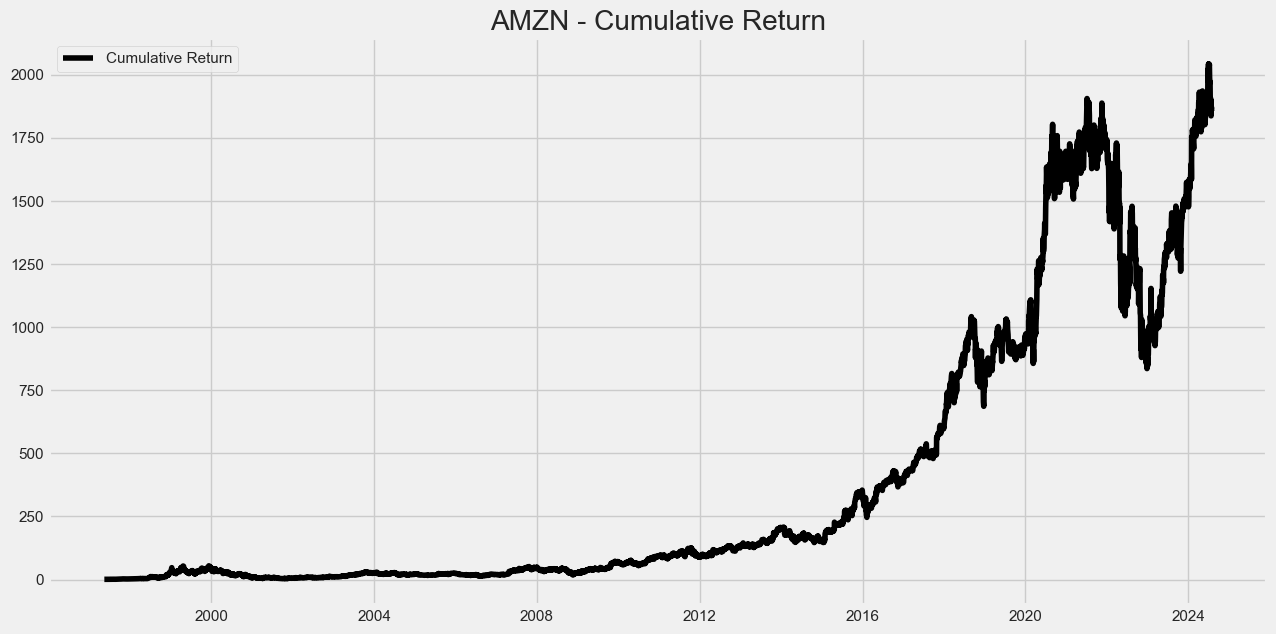

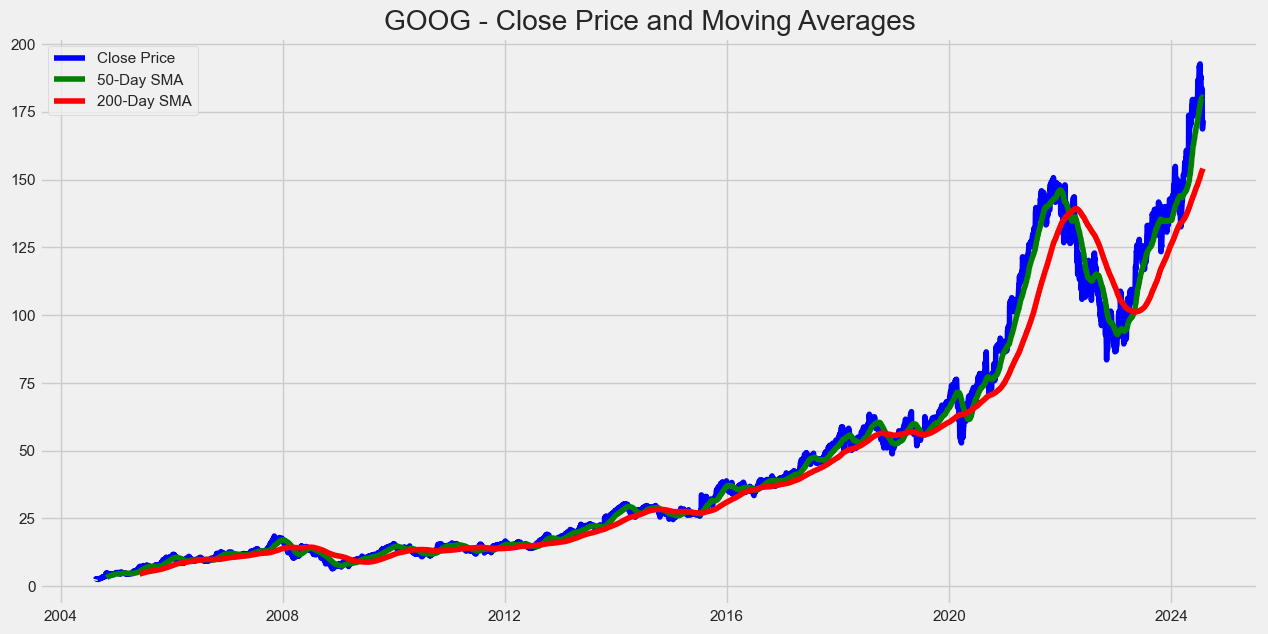

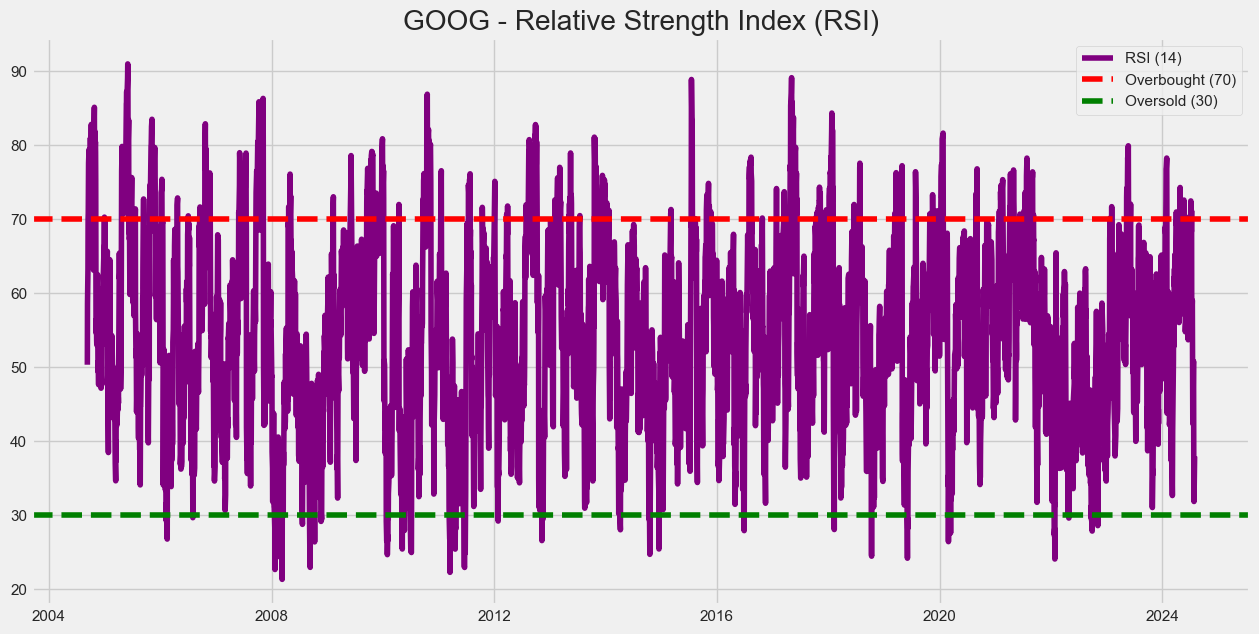

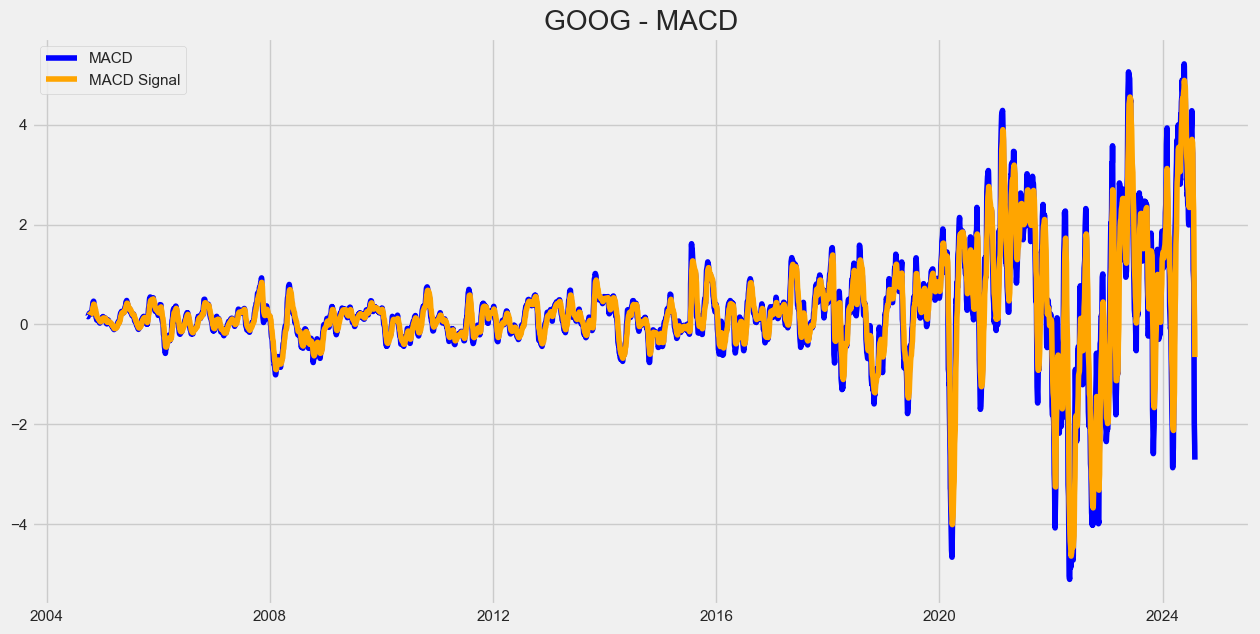

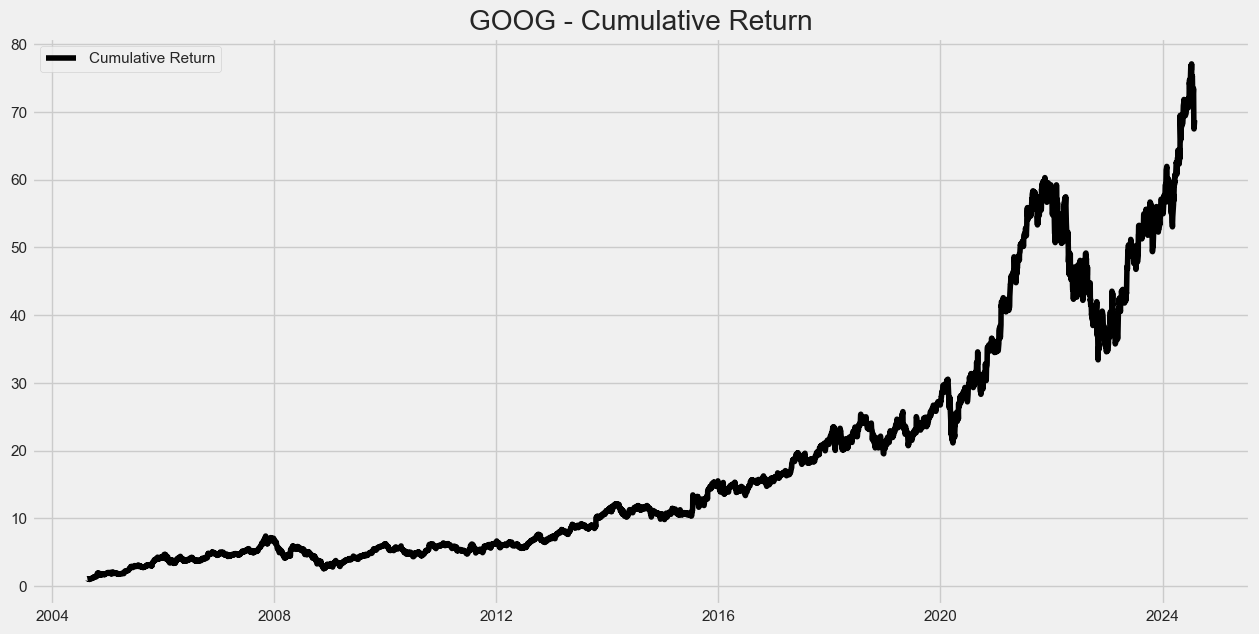

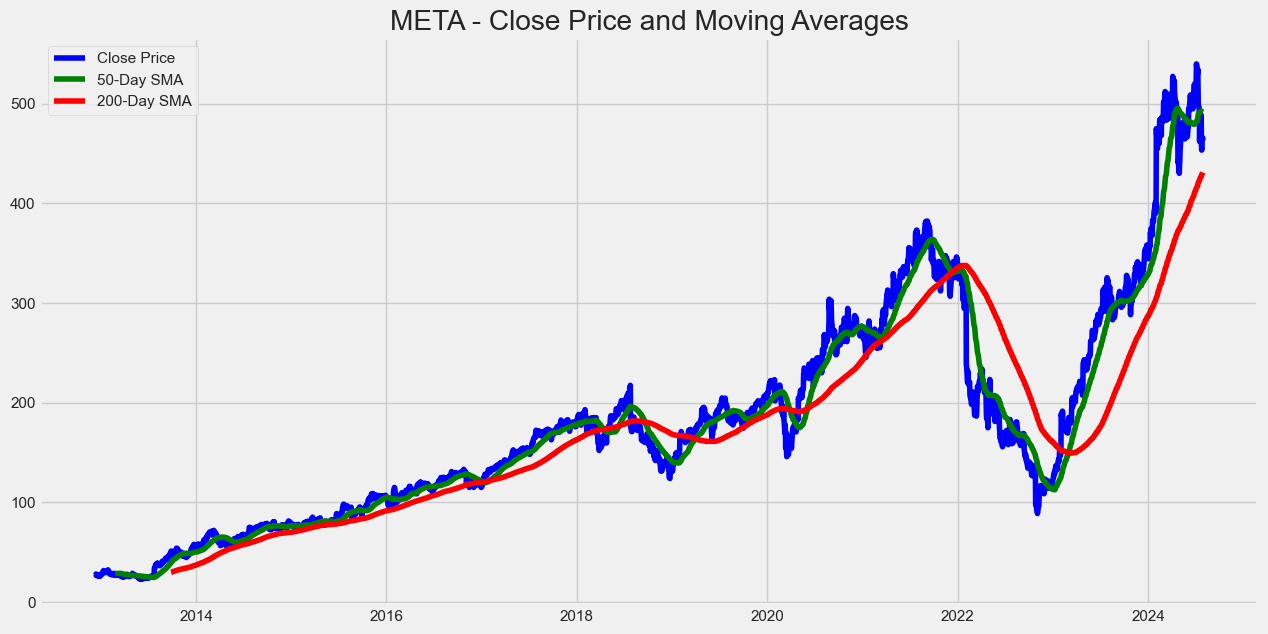

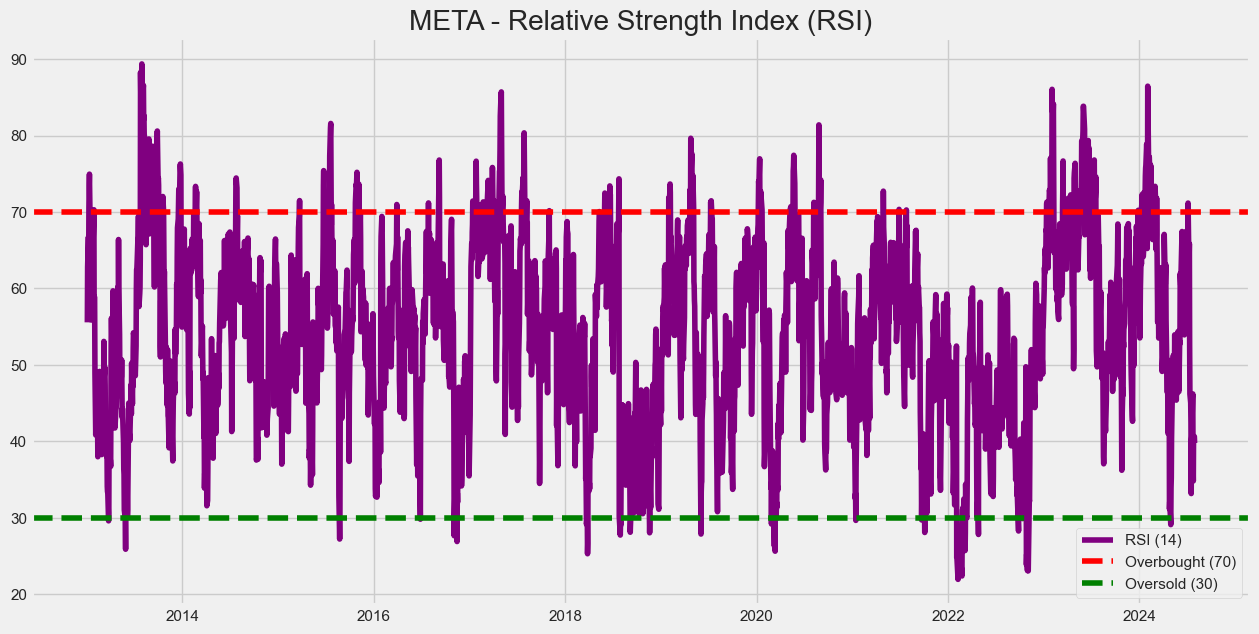

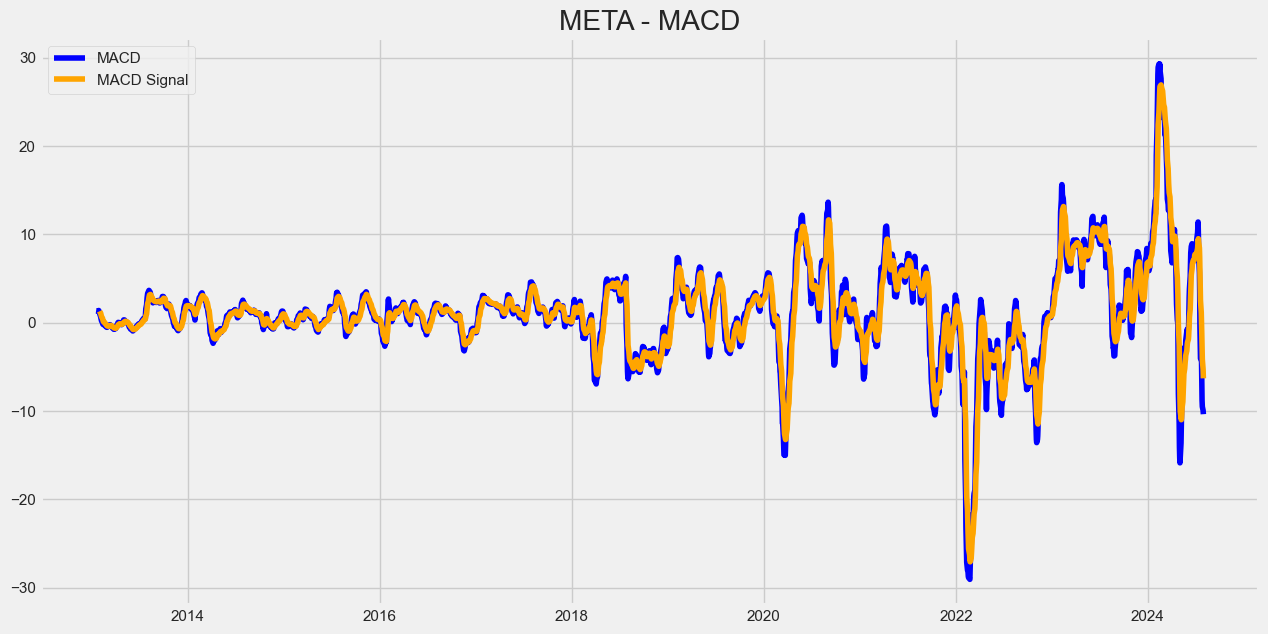

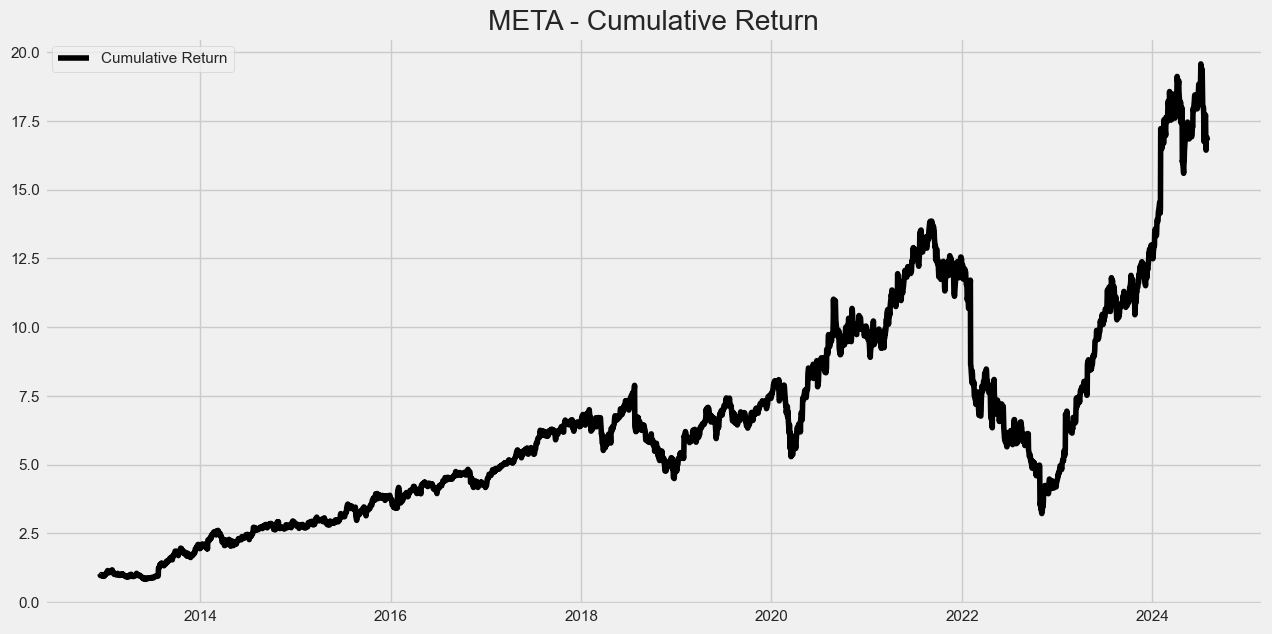

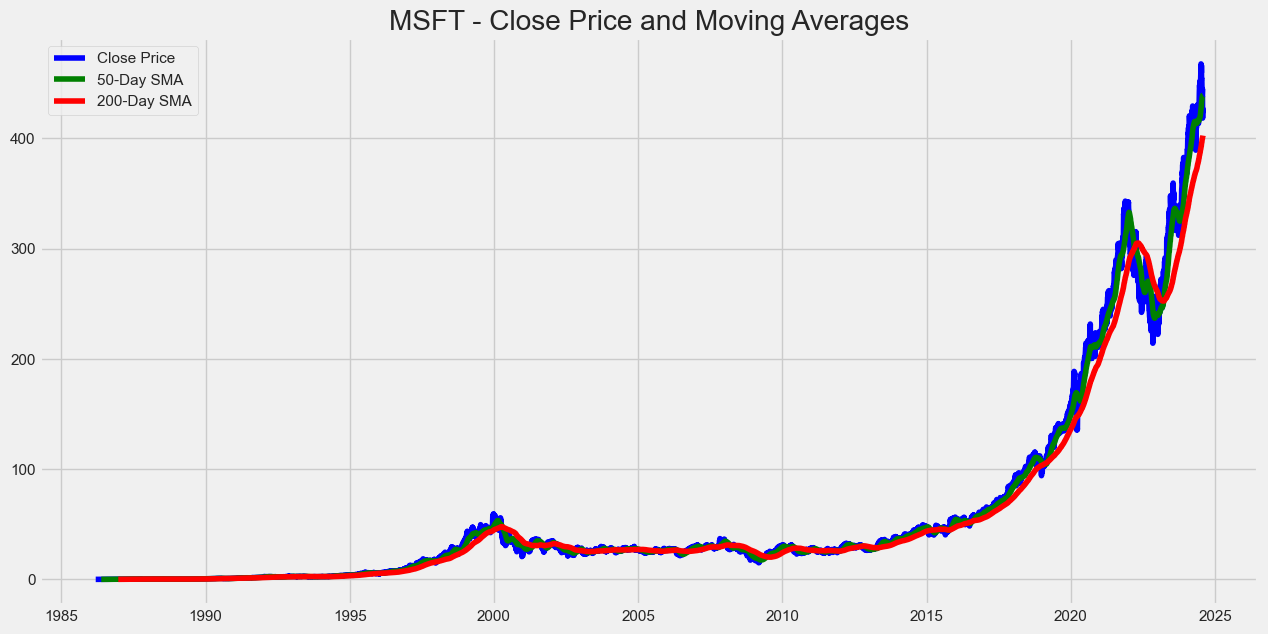

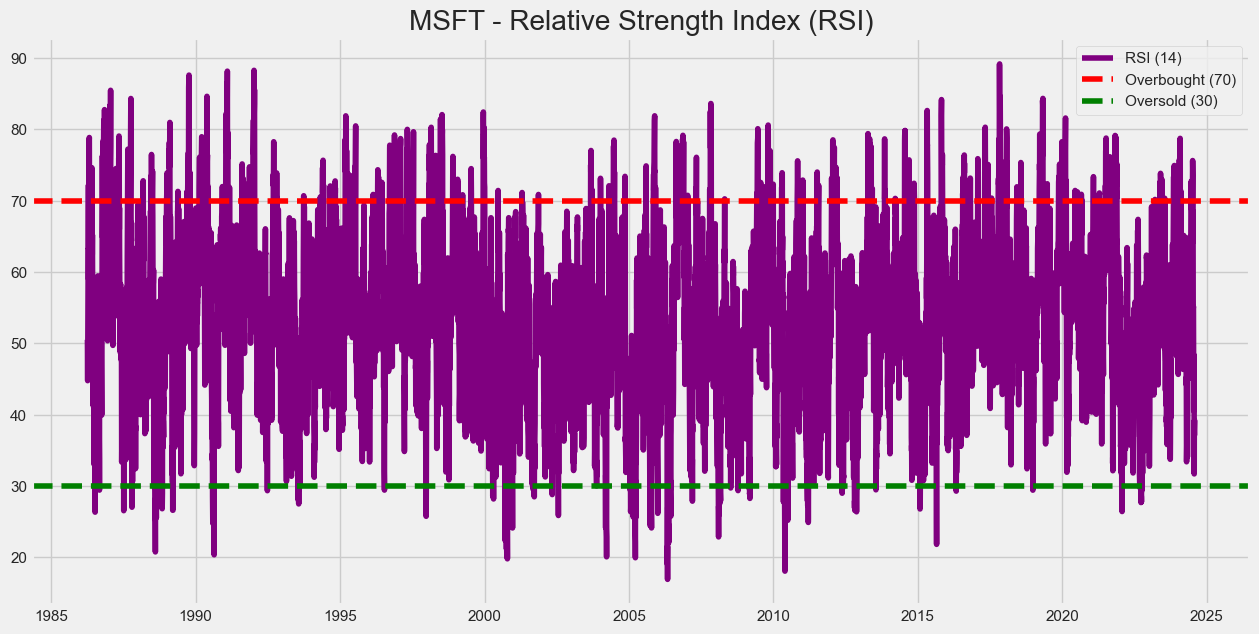

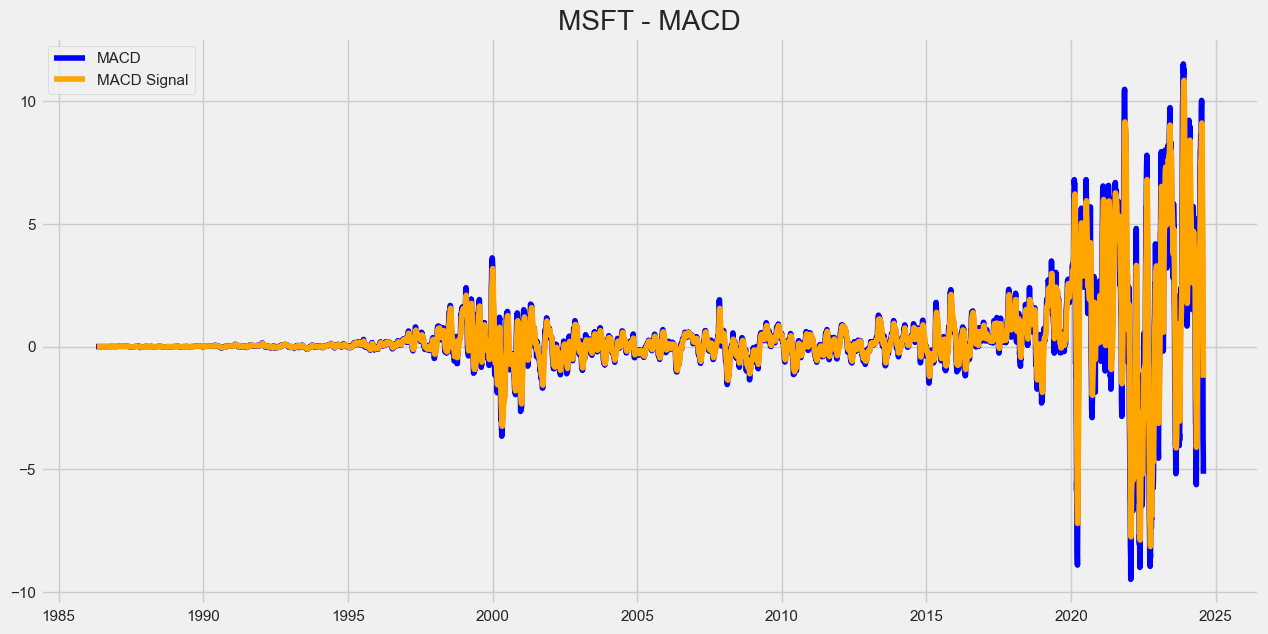

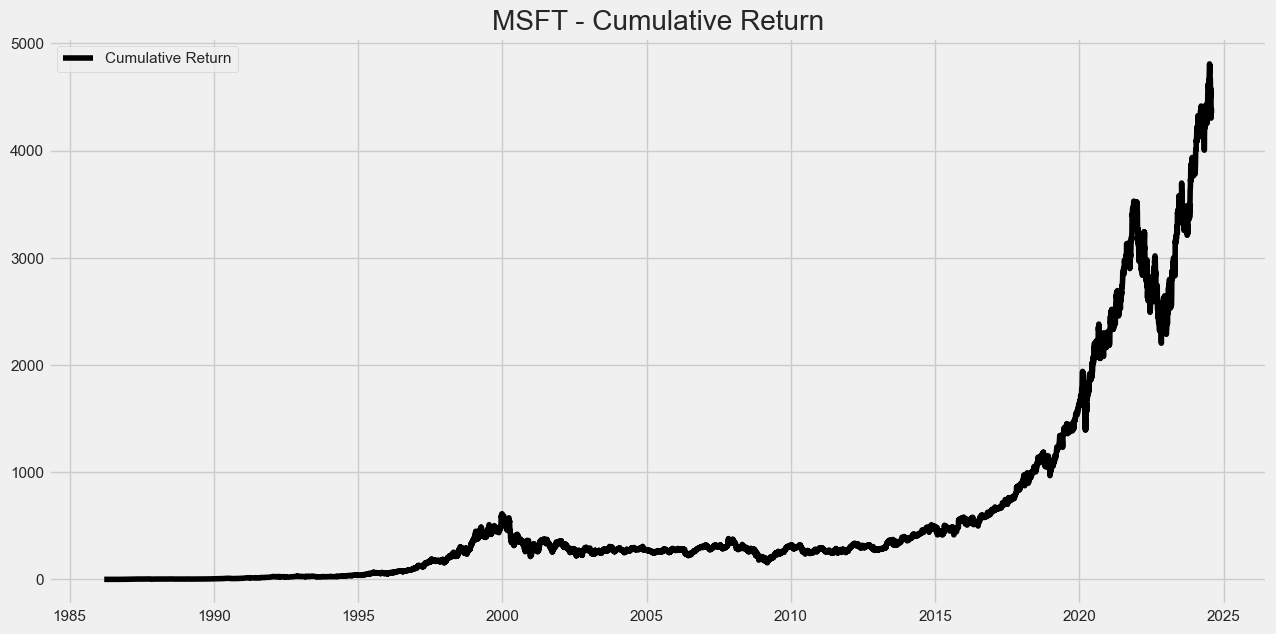

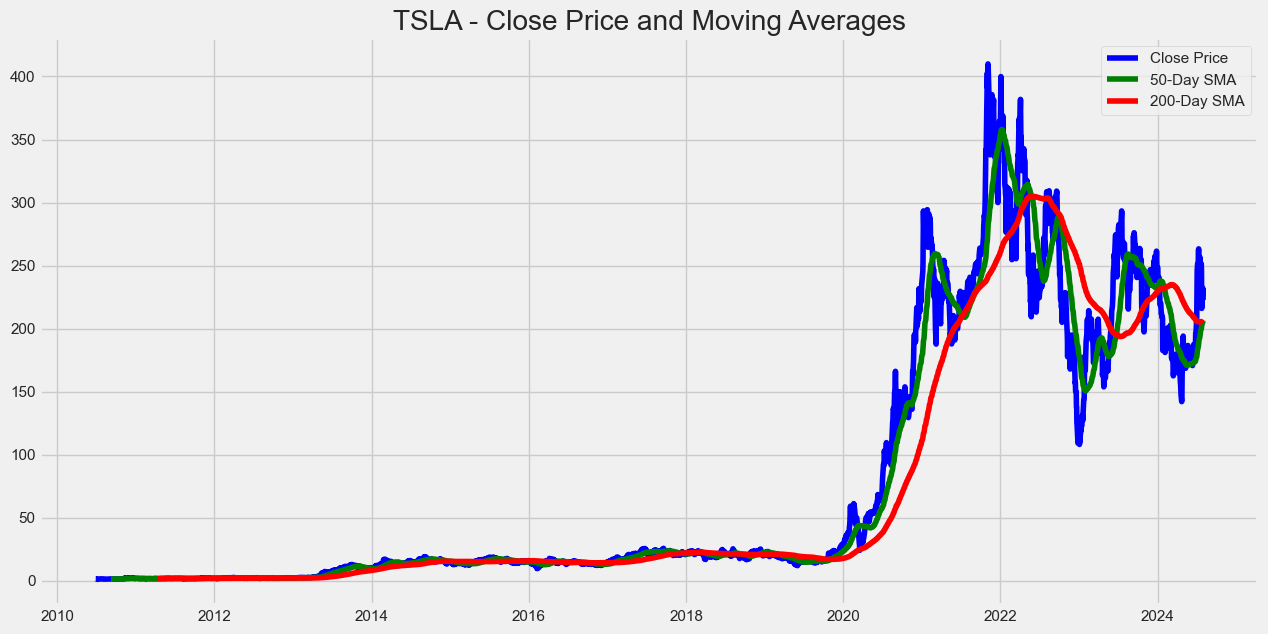

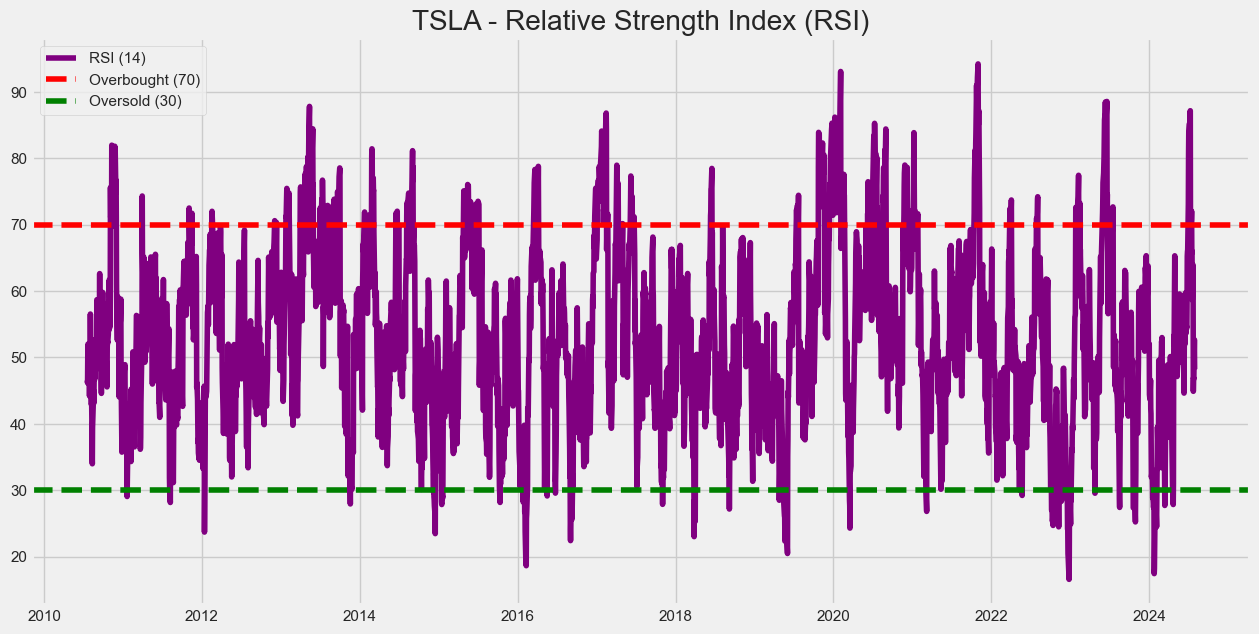

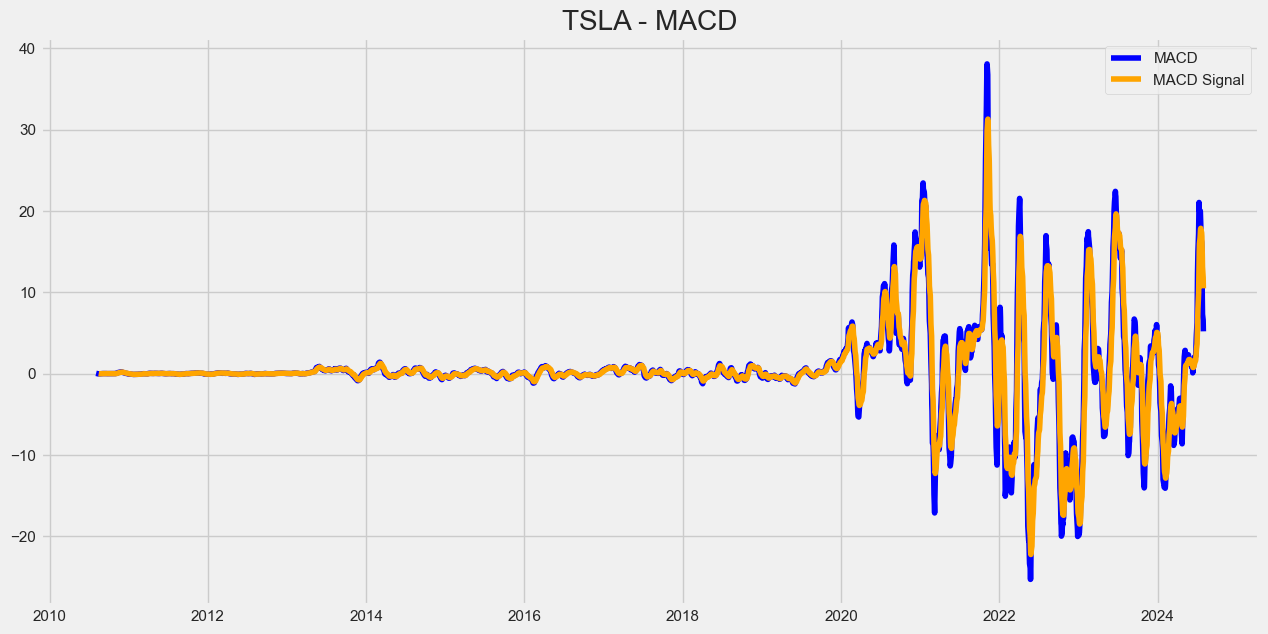

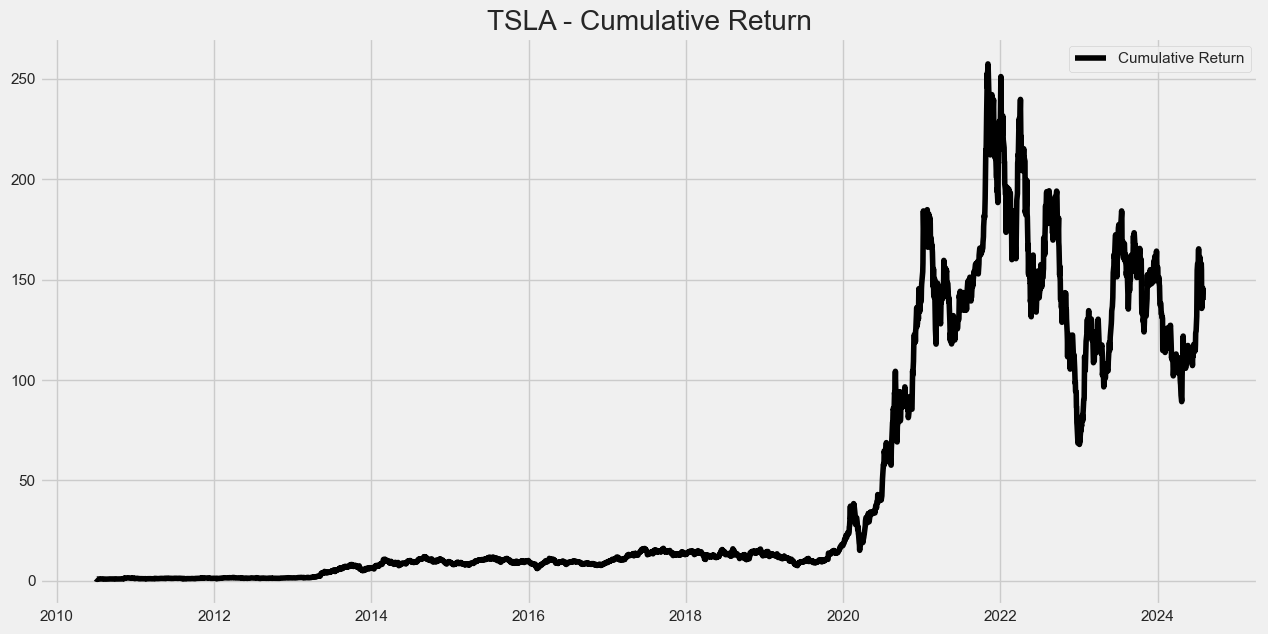

In [41]:
for ticker, data in stocks_data.items():
    plot_close_price_moving_average(data, ticker)
    plot_rsi(data, ticker)
    plot_macd(data, ticker)
    plot_cumulative_return(data, ticker)